### CSV 라이브러리 탐색

In [1]:
import csv
with open("mytest.csv", "w") as file:
    writer = csv.writer(file)

In [9]:

with open("mytest.csv", "a") as file:
    writer = csv.writer(file)
    writer.writerow([11, None, 13, 14])
    

In [10]:
import pandas as pd

data = pd.read_csv("mytest.csv", header=None)
data

,0,1,2,3,4
0,1,2.0,3,4,5.0
1,11,12.0,13,14,15.0
2,11,12.0,13,14,NaN
3,11,NaN,13,14,NaN


In [11]:
# 데이터 불러오기
import pandas as pd

file_path = "../../hand_data.csv"

data = pd.read_csv(file_path, header=None)
print(data.shape)
data.head()


(85, 64)


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.687376,0.718678,-8.955085e-07,0.606017,0.672029,-0.040610,0.528516,0.562746,-0.061993,0.503502,...,0.700271,0.421727,-0.078378,0.685655,0.508520,-0.059119,0.702900,0.513098,-0.034315,rock
1,0.675920,0.720784,-8.083392e-07,0.596619,0.670266,-0.046151,0.521691,0.564559,-0.072125,0.494072,...,0.690574,0.429687,-0.077167,0.675987,0.513217,-0.059221,0.692829,0.513333,-0.035067,rock
2,0.677771,0.720415,-7.735202e-07,0.598454,0.672924,-0.048494,0.520575,0.568397,-0.075042,0.492368,...,0.691161,0.435076,-0.075859,0.677687,0.517159,-0.059821,0.693267,0.514683,-0.037131,rock
3,0.676640,0.719837,-7.747204e-07,0.597944,0.672340,-0.048379,0.519844,0.567219,-0.074529,0.490563,...,0.688879,0.432751,-0.074645,0.675053,0.514236,-0.058460,0.690749,0.511910,-0.035896,rock
4,0.675475,0.725187,-7.957665e-07,0.596824,0.677434,-0.048345,0.520293,0.572524,-0.075431,0.491970,...,0.689490,0.440088,-0.078547,0.675610,0.522143,-0.062326,0.691244,0.518687,-0.039594,rock


In [12]:
columns = []
for i in range(21):
    columns.extend([f"x{i}", f"y{i}", f"z{i}"])
columns.append("label")
data.columns = columns


In [13]:
data.head()

,x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,...,x18,y18,z18,x19,y19,z19,x20,y20,z20,label
0,0.687376,0.718678,-8.955085e-07,0.606017,0.672029,-0.040610,0.528516,0.562746,-0.061993,0.503502,...,0.700271,0.421727,-0.078378,0.685655,0.508520,-0.059119,0.702900,0.513098,-0.034315,rock
1,0.675920,0.720784,-8.083392e-07,0.596619,0.670266,-0.046151,0.521691,0.564559,-0.072125,0.494072,...,0.690574,0.429687,-0.077167,0.675987,0.513217,-0.059221,0.692829,0.513333,-0.035067,rock
2,0.677771,0.720415,-7.735202e-07,0.598454,0.672924,-0.048494,0.520575,0.568397,-0.075042,0.492368,...,0.691161,0.435076,-0.075859,0.677687,0.517159,-0.059821,0.693267,0.514683,-0.037131,rock
3,0.676640,0.719837,-7.747204e-07,0.597944,0.672340,-0.048379,0.519844,0.567219,-0.074529,0.490563,...,0.688879,0.432751,-0.074645,0.675053,0.514236,-0.058460,0.690749,0.511910,-0.035896,rock
4,0.675475,0.725187,-7.957665e-07,0.596824,0.677434,-0.048345,0.520293,0.572524,-0.075431,0.491970,...,0.689490,0.440088,-0.078547,0.675610,0.522143,-0.062326,0.691244,0.518687,-0.039594,rock


In [21]:
# 라벨의 각 카테고리별 카운트
data.groupby("label").count().x0

label
paper       33
rock        24
scissors    28
Name: x0, dtype: int64

In [22]:
def encoding(label):
    if label == "rock":
        return 0
    elif label == "scissors":
        return 1
    elif label == "paper":
        return 2
    
data["label_enc"] = data["label"].apply(lambda x: encoding(x))
data.head(2)

,x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,...,y18,z18,x19,y19,z19,x20,y20,z20,label,label_enc
0,0.687376,0.718678,-8.955085e-07,0.606017,0.672029,-0.040610,0.528516,0.562746,-0.061993,0.503502,...,0.421727,-0.078378,0.685655,0.508520,-0.059119,0.702900,0.513098,-0.034315,rock,0
1,0.675920,0.720784,-8.083392e-07,0.596619,0.670266,-0.046151,0.521691,0.564559,-0.072125,0.494072,...,0.429687,-0.077167,0.675987,0.513217,-0.059221,0.692829,0.513333,-0.035067,rock,0


In [23]:
# 데이터 분할하기
X = data.iloc[:, :-2]
y = data["label_enc"]
print(X.shape, y.shape)

(85, 63) (85,)


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}, X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (68, 63), y_train: (68,), X_test: (17, 63), y_test: (17,)


In [25]:
# 모델 만들기
from xgboost import XGBClassifier
import numpy as np

# 앙상블
# - 배깅: 독립적으로 여러 모델들을 합하여 성능을 냄
# - 부스팅: 단계별로 이전 모델의 약점을 보완한 모델 

model = XGBClassifier(n_estimators=100, random_state=42)
model.fit(np.array(X_train), np.array(y_train))


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

Accuracy: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         7

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17



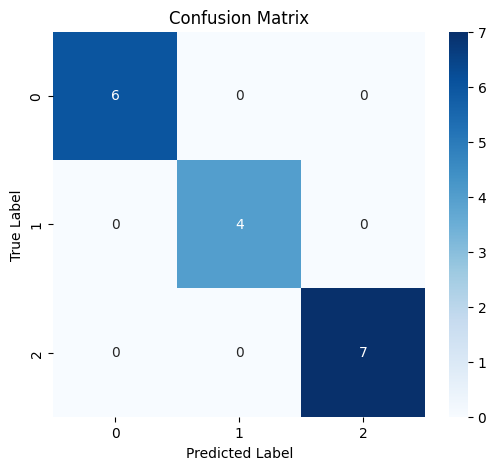

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 예측 수행
y_pred = model.predict(np.array(X_test))

# 혼동 행렬 계산
cm = confusion_matrix(y_test, y_pred)

# 정확도(Accuracy) 출력
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# 분류 보고서 출력
print("Classification Report:\n", classification_report(y_test, y_pred))

# 혼동 행렬 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [27]:
import pickle
with open("rock_scissors_paper.pkl", "wb") as f:
    pickle.dump(model, f)